<a href="https://colab.research.google.com/github/muk465/CS6910-Fundamentals-of-Deeplearning/blob/main/Assignment2/PartA/filter_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#to get the dataset from url
!wget https://storage.googleapis.com/wandb_datasets/nature_12K.zip \
      --no-check-certificate
#unzip the data set
!unzip nature_12K.zip

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model

In [ ]:
# Assign training and validation set directories
import os
base_dir = '/content/inaturalist_12K'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'val')

In [ ]:
load the saved model
model=tf.keras.models.load_model('./drive/MyDrive/Models/model_final')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 32)      2432      
                                                                 
 activation (Activation)     (None, 496, 496, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 496, 496, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 248, 248, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 244, 244, 32)      2

In [ ]:
layer = model.layers #gives us the layers 
filters, biases = model.layers[0].get_weights() #gets filters  weights of the first conv layer 
print(layer[0].name, filters.shape)

conv2d (5, 5, 3, 32)


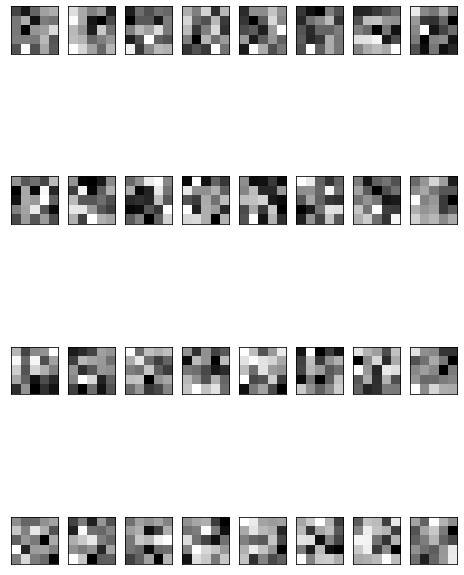

In [ ]:
#plot of the weights of the first conv layer for 1st channel
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(0, n_filters):
    f = filters[:, :, :, i]
    fig1 =plt.subplot(rows, columns, i+1)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
plt.show()    

In [ ]:
#getting op of first activation layer

outputs = [model.layers[1].output]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 500, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 496, 496, 32)      2432      
                                                                 
 activation (Activation)     (None, 496, 496, 32)      0         
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator= test_datagen.flow_from_directory(
            test_dir,
            target_size=(500,500),
            batch_size=1,
            class_mode='categorical')

Found 2000 images belonging to 10 classes.


In [ ]:
x_batch, y_batch = next(test_generator)

In [ ]:

feature_output = model_short.predict(x_batch)

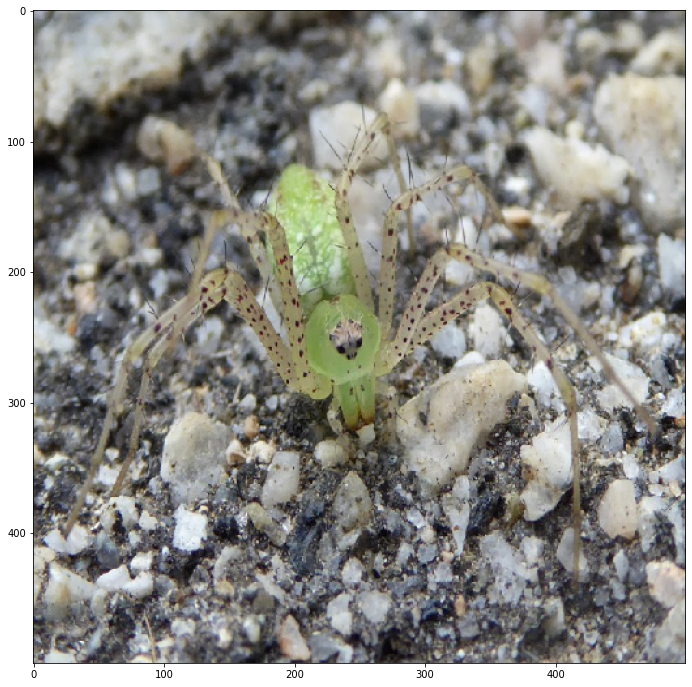

In [ ]:
fig=plt.figure(figsize=(12, 12))

plt.imshow(x_batch[0,:, :,:])

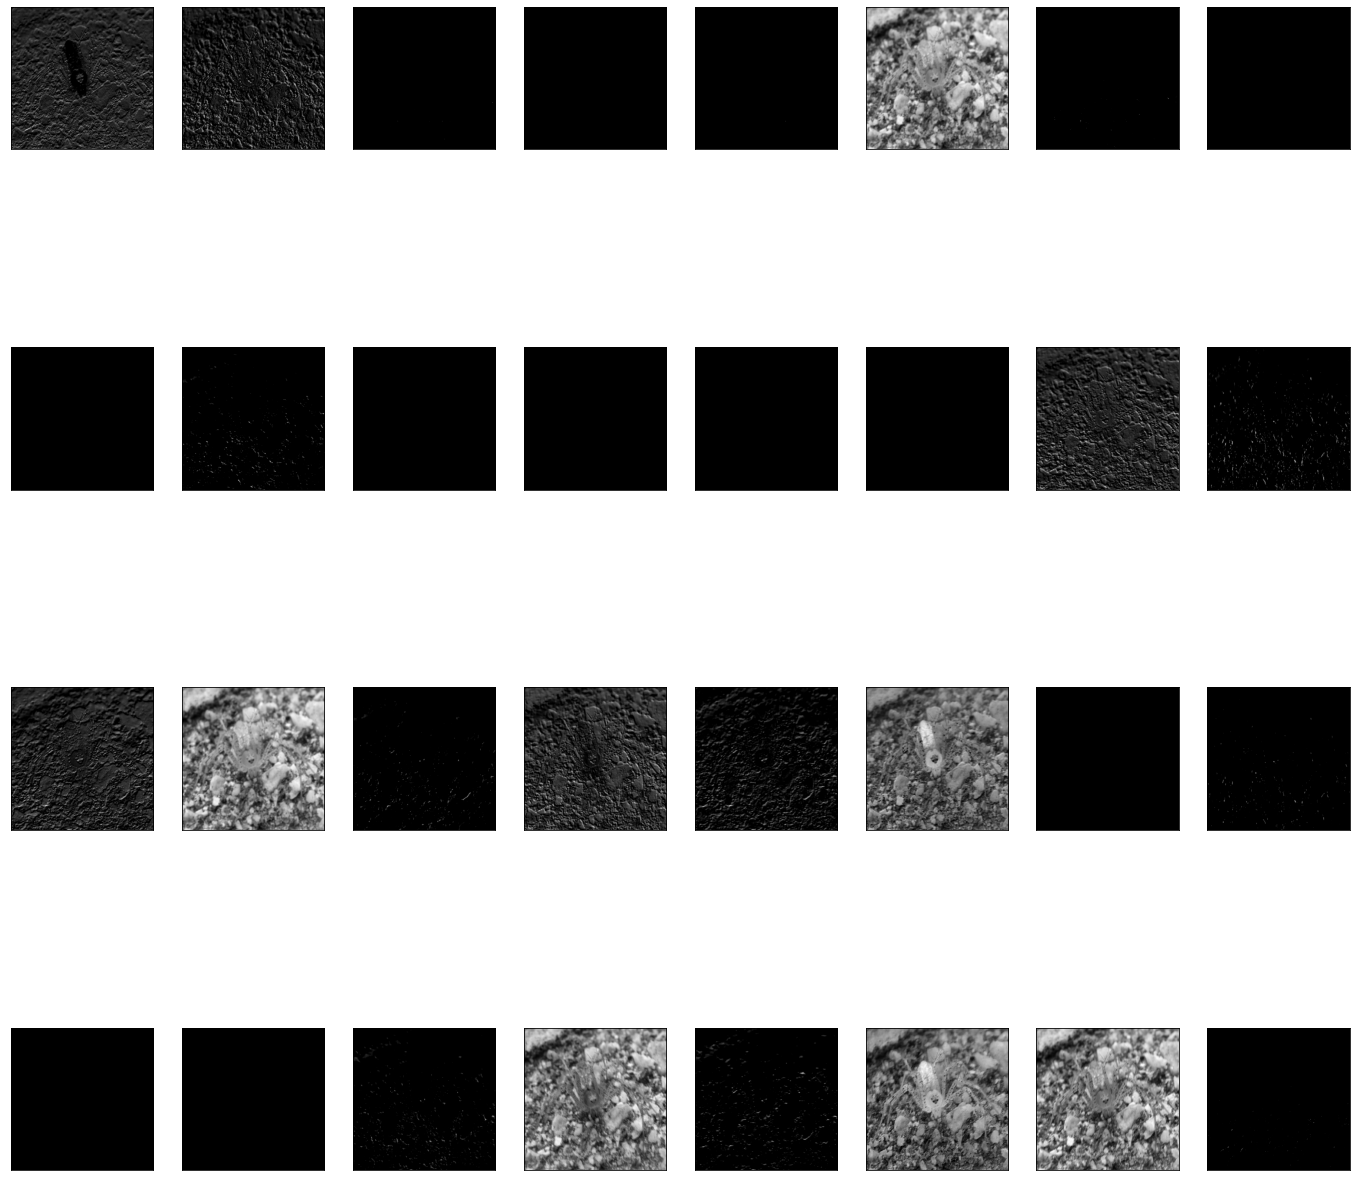

In [ ]:

from keras.preprocessing.image import load_img, img_to_array

#feature_output = model_short.predict(x_batch)

columns = 8
rows = 4
for ftr in feature_output:
    fig=plt.figure(figsize=(24, 24))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[:, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

In [ ]:
#output of preactivation of 1st layer or op of conv layer
outputs2 = [model.layers[0].output]
model_short2 = Model(inputs=model.inputs, outputs=outputs2)
print(model_short2.summary())
feature_output2= model_short2.predict(x_batch)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 500, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 496, 496, 32)      2432      
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
None


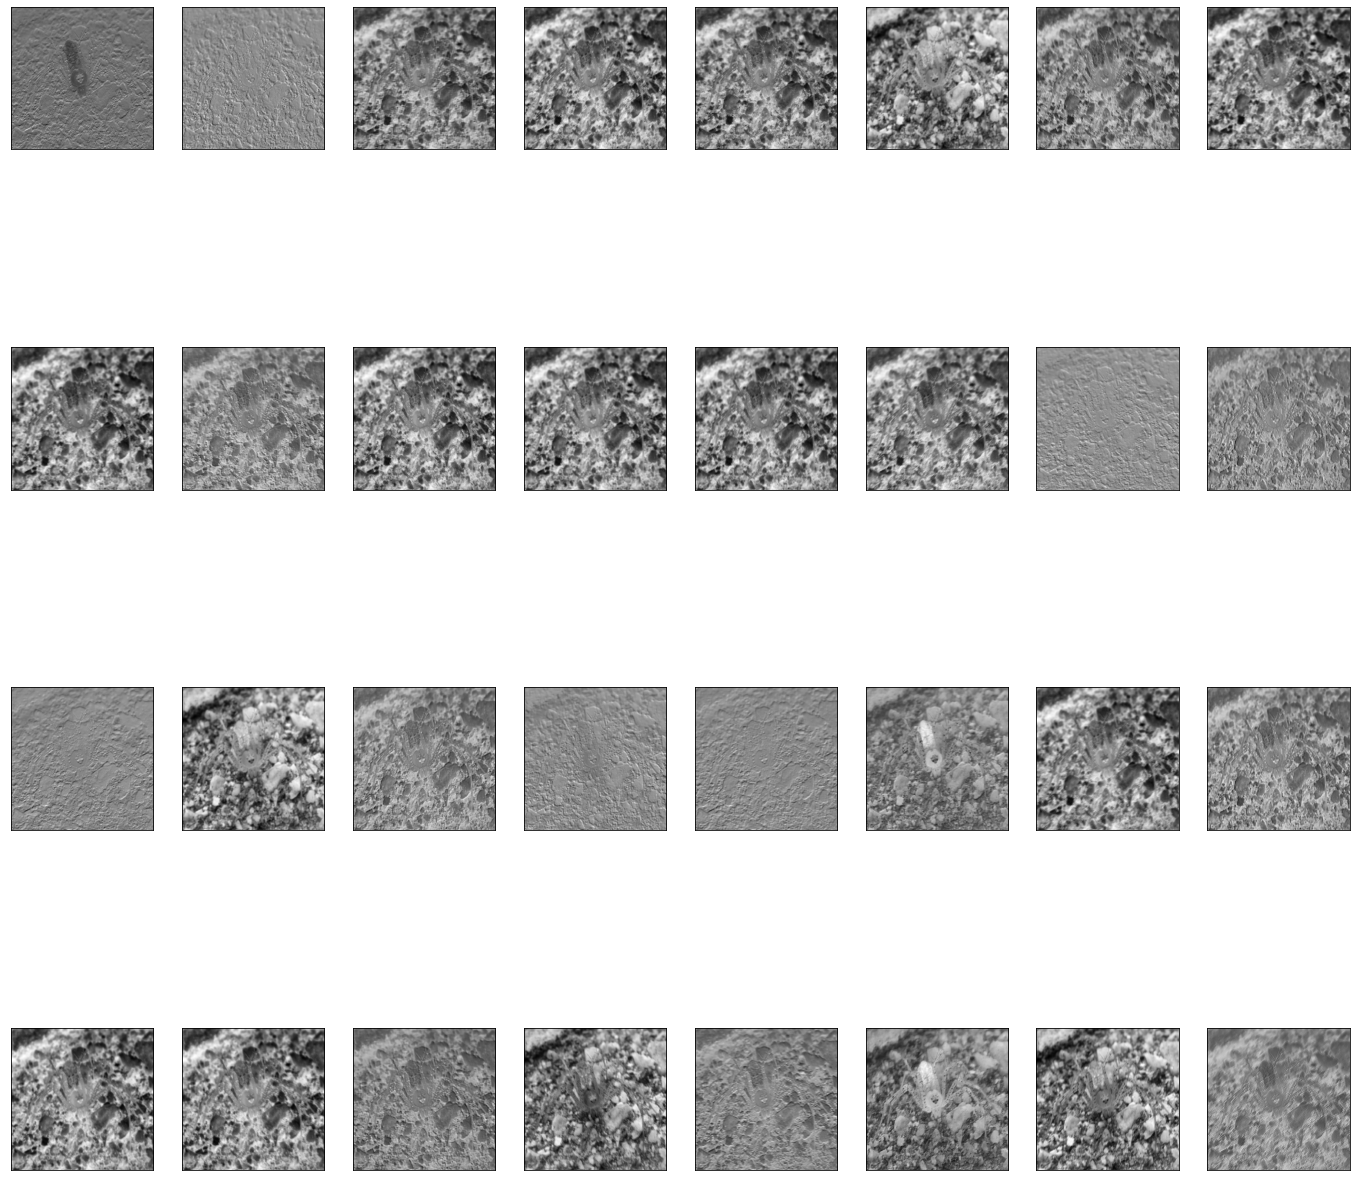

In [ ]:
columns = 8
rows = 4
for ftr in feature_output2:
    fig=plt.figure(figsize=(24, 24))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[:, :, i-1], cmap='gray')
        #pos += 1
    plt.show()